<a href="https://colab.research.google.com/github/EunjaeHan/ML/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [ ]:
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [ ]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=8, verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0748
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 16/50
40/40 ━━━━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


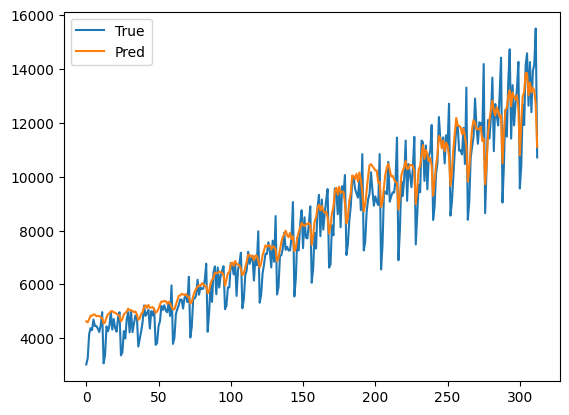

In [ ]:
# 5. 예측
pred = model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1391
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
최종 학습 로스 (MSE): 0.008467


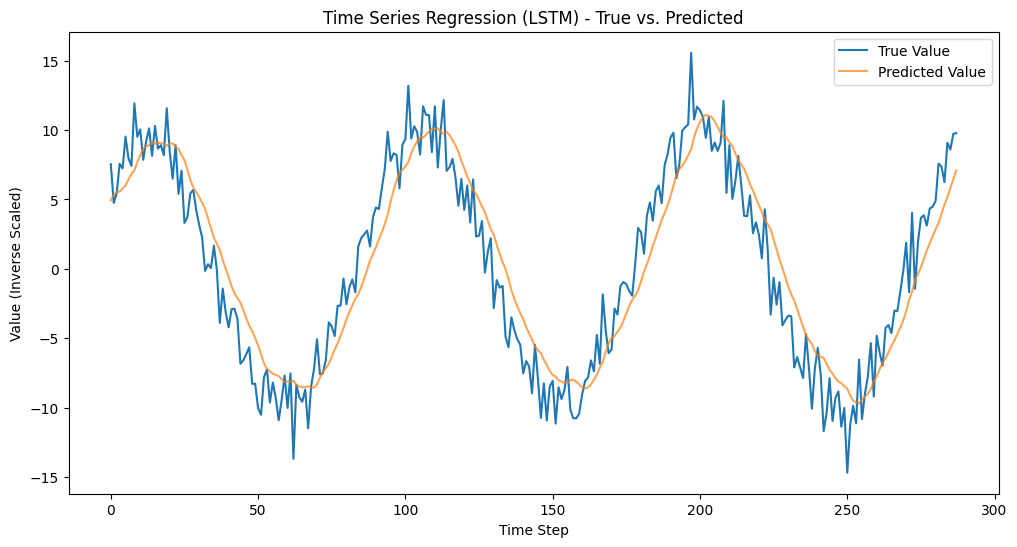

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 가상의 시계열 데이터 생성 (원본 데이터 대체)
np.random.seed(42)
time = np.arange(0, 300)
# 사인파 + 노이즈를 포함한 시계열 데이터
dummy_data = 10 * np.sin(time / 15) + np.random.normal(0, 1.5, 300)
data = dummy_data.reshape(-1, 1)

# 2. 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 3. 시퀀스 생성 (window = 12)
window = 12
X, y = [], []
for i in range(len(data) - window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# 4. LSTM 모델 정의 및 학습 (사용자 코드와 동일한 구조)
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

# 로스 함수: Mean Squared Error (MSE) - 회귀 분석에 가장 흔히 사용됨
model.compile(optimizer='adam', loss='mse')

# 학습 실행 (예제이므로 epochs를 5로 줄여 빠르게 확인)
history = model.fit(X, y, epochs=5, batch_size=8, verbose=1)

# 5. 예측 및 결과 시각화
pred = model.predict(X)

# 최종 로스 값 추출
final_loss = history.history['loss'][-1]

# 실제 값과 예측 값 역정규화
true_values = scaler.inverse_transform(y)
predicted_values = scaler.inverse_transform(pred)

# 플롯 생성
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Value')
plt.plot(predicted_values, label='Predicted Value', alpha=0.7)
plt.title('Time Series Regression (LSTM) - True vs. Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value (Inverse Scaled)')
plt.legend()
plt.savefig('lstm_regression_result.png')

print(f"최종 학습 로스 (MSE): {final_loss:.6f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


--- 모델 학습 시작 ---
--- 모델 학습 완료 ---
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

최종 학습 로스 (MSE): 0.003745


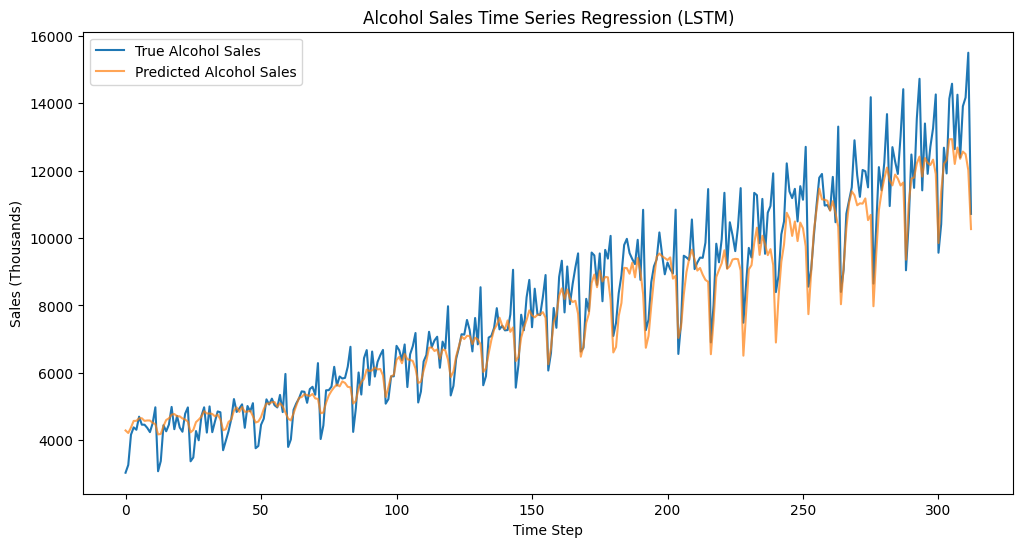

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')

# 2. 데이터 확인 및 전처리
data = df['S4248SM144NCEN'].values.reshape(-1, 1)

# 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 시퀀스 생성
window = 12  # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data) - window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# 3. LSTM 모델 정의 및 학습
# (사용자 코드의 최종 LSTM 모델 사용)
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 학습 실행
print("--- 모델 학습 시작 ---")
history = model.fit(X, y, epochs=50, batch_size=8, verbose=0) # verbose=0으로 설정하여 출력 간소화
print("--- 모델 학습 완료 ---")

# 최종 로스 값 추출
final_loss = history.history['loss'][-1]

# 4. 예측
pred = model.predict(X)

# 실제 값과 예측 값 역정규화
true_values = scaler.inverse_transform(y)
predicted_values = scaler.inverse_transform(pred)

# 5. 시각화
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Alcohol Sales')
plt.plot(predicted_values, label='Predicted Alcohol Sales', alpha=0.7)
plt.title('Alcohol Sales Time Series Regression (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Sales (Thousands)')
plt.legend()
plt.savefig('alcohol_sales_regression_result.png')

print(f"\n최종 학습 로스 (MSE): {final_loss:.6f}")